# Projeto Final

In [42]:
#Importação das bibliotecas

import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
#conexão
conn = psycopg2.connect(
    host="localhost",
    database="credito",
    user="postgres",
    password="1234",
    port=5432,
)

In [26]:
#cria um cursor
cursor = conn.cursor()
#define consulta
query = 'SELECT * FROM "CREDITO";'
#executa
df_credito = pd.read_sql(query, conn)
df_credito.head(10)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_3820\3156875879.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_credito = pd.read_sql(query, conn)


,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
5,7,24,2,3,2835,3,2.0,3,4,3,4.0,53,3,1.0,1,4,1,0,0,1
6,9,12,2,1,3059,4,4.0,2,2,3,4.0,61,3,1.0,1,3,1,0,0,1
7,11,12,2,4,1295,2,1.0,3,1,3,1.0,25,3,3.0,1,4,1,0,0,0
8,13,12,2,1,1567,2,3.0,1,1,3,1.0,22,3,1.0,1,4,1,1,0,1
9,14,24,1,4,1199,2,2.0,4,4,3,4.0,60,3,1.0,2,3,1,0,0,0


Análise Exploratoria

In [28]:
groupby_HistoricoCredito = df_credito.groupby(df_credito['HistoricoCredito']).size()
groupby_HistoricoCredito

HistoricoCredito
0     11
1    289
2    526
3     86
4     40
5     48
dtype: int64

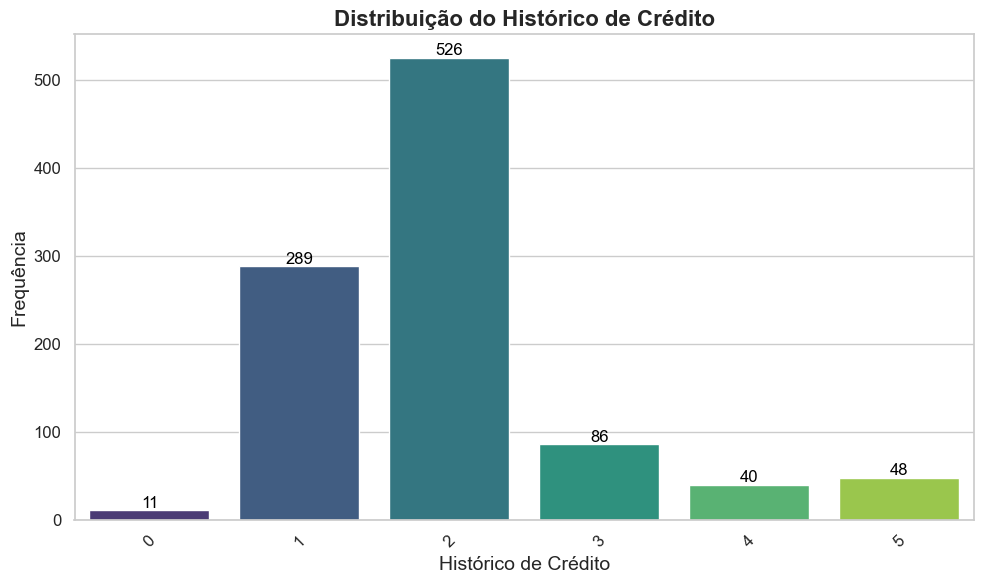

In [43]:
# Defina o estilo
sns.set_theme(style="whitegrid")

# Criando o barplot
plt.figure(figsize=(10, 6))  # Tamanho da figura
barplot = sns.barplot(
    x=groupby_HistoricoCredito.index, 
    y=groupby_HistoricoCredito.values, 
    palette="viridis"  # Paleta de cores
)

# Adicionando rótulos aos eixos e título
plt.title("Distribuição do Histórico de Crédito", fontsize=16, fontweight='bold')
plt.xlabel("Histórico de Crédito", fontsize=14)
plt.ylabel("Frequência", fontsize=14)

# Rotacionando os rótulos do eixo x (se necessário)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionando valores no topo de cada barra
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".0f"),  # Formato do número
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição
        ha="center", va="center", fontsize=12, color="black", xytext=(0, 5),
        textcoords="offset points"
    )

# Ajustando layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [34]:
# Verificando valores faltantes
df_credito['HistoricoCredito'].isnull().sum()

np.int64(0)

Coluna "Proposito"

In [44]:
groupby_Proposito = df_credito.groupby([df_credito['Proposito']]).size()
groupby_Proposito

Proposito
1     280
2      50
3     181
4     234
5     103
6      97
7      12
8      22
9      12
10      9
dtype: int64

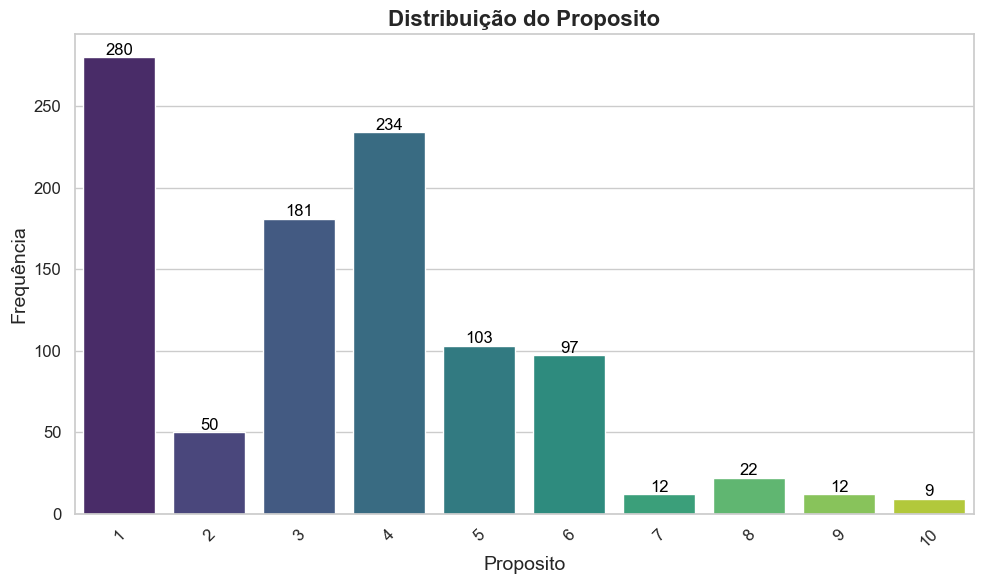

In [45]:
# Defina o estilo
sns.set_theme(style="whitegrid")

# Criando o barplot
plt.figure(figsize=(10, 6))  # Tamanho da figura
barplot = sns.barplot(
    x=groupby_Proposito.index, 
    y=groupby_Proposito.values, 
    palette="viridis"  # Paleta de cores
)

# Adicionando rótulos aos eixos e título
plt.title("Distribuição do Proposito", fontsize=16, fontweight='bold')
plt.xlabel("Proposito", fontsize=14)
plt.ylabel("Frequência", fontsize=14)

# Rotacionando os rótulos do eixo x (se necessário)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionando valores no topo de cada barra
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".0f"),  # Formato do número
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição
        ha="center", va="center", fontsize=12, color="black", xytext=(0, 5),
        textcoords="offset points"
    )

# Ajustando layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [47]:
# Valores Faltantes
df_credito['Proposito'].isnull().sum()

np.int64(0)

Coluna "Investimentos"

In [48]:
groupby_Investimentos = df_credito.groupby(['Investimentos']).size()
groupby_Investimentos

Investimentos
1    183
2    603
3     63
4     48
5    103
dtype: int64

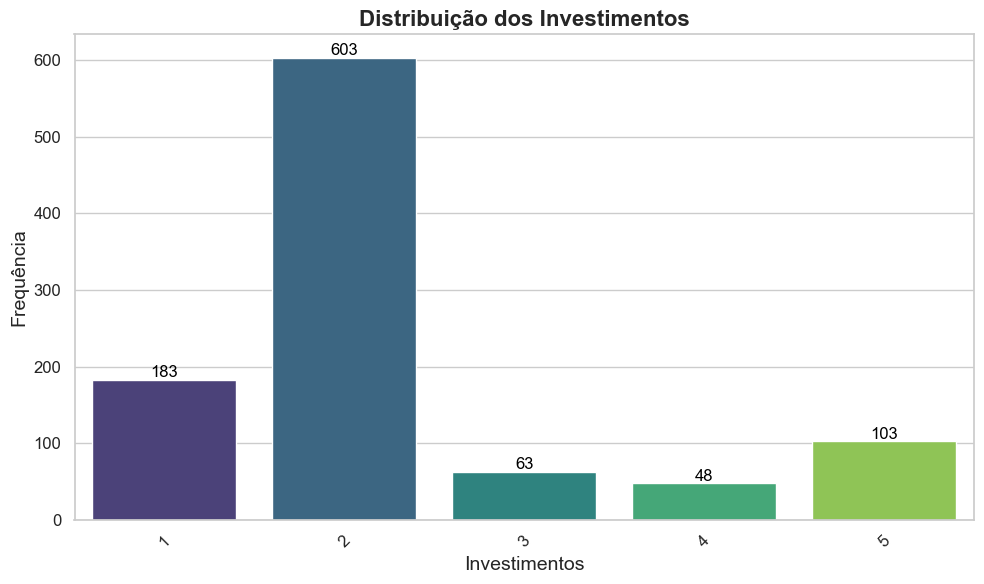

In [49]:
# Defina o estilo
sns.set_theme(style="whitegrid")

# Criando o barplot
plt.figure(figsize=(10, 6))  # Tamanho da figura
barplot = sns.barplot(
    x=groupby_Investimentos.index, 
    y=groupby_Investimentos.values, 
    palette="viridis"  # Paleta de cores
)

# Adicionando rótulos aos eixos e título
plt.title("Distribuição dos Investimentos", fontsize=16, fontweight='bold')
plt.xlabel("Investimentos", fontsize=14)
plt.ylabel("Frequência", fontsize=14)

# Rotacionando os rótulos do eixo x (se necessário)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionando valores no topo de cada barra
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".0f"),  # Formato do número
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição
        ha="center", va="center", fontsize=12, color="black", xytext=(0, 5),
        textcoords="offset points"
    )

# Ajustando layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [50]:
# Valores Faltantes
df_credito['Investimentos'].isnull().sum()

np.int64(0)

Coluna "Investimentos"